In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [81]:
base_path_evals = f"/home/arnau/Desktop/Cambridge/MARS/correctness-model-internals/evaluations"
base_path_verbalized = "/home/arnau/Desktop/Cambridge/MARS/correctness-model-internals/verbalized_confidence/generations"

In [83]:
# All AUROC
models = ["mistral_7b_instruct", "llama3.1_8b_chat", "ministral_8b_instruct"]
datasets = ["birth_years_4k", "cities_10k", "gsm8k", "math_operations_6k", "medals_9k", "trivia_qa_2_60k"]
print("Verbalized confidence AUROC")
for model in models:
    print(f"Model: {model}")
    for dataset in datasets:
        if dataset != "gsm8k":
            df_evals = pd.read_csv(f"{base_path_evals}/{model}/{dataset}/base/main_generations_evaluated.csv")
        else:
            df_evals = pd.read_csv(f"{base_path_evals}/{model}/{dataset}/base_3_shot/main_generations_evaluated.csv")
        df_verb = pd.read_csv(f"{base_path_verbalized}/{model}/{dataset}/verbalized_confidence_raw/main_generations.csv")
        labels = df_evals["correct"]
        answers = df_verb["answer"].apply(lambda x: x.split("%")[0].strip())
        answers = answers.apply(lambda x: x.split(".")[0].strip())
        answers = answers.apply(lambda x: x if isinstance(x, str) and x.isdigit() and 0 <= int(x) <= 100 else "0")
        answers = answers.astype("int")
        auc = roc_auc_score(labels, answers)
        min_class_size = min(labels.sum(), (~labels).sum())
        balanced_idx = pd.concat([
            labels[labels].sample(min_class_size, random_state=42),
            labels[~labels].sample(min_class_size, random_state=42)
        ]).index
        auc_balanced = roc_auc_score(labels[balanced_idx], answers[balanced_idx])
        print(f"Dataset: {dataset:<20} AUROC: {auc:>6.3f}  Balanced AUROC: {auc_balanced:>6.3f}")
    print("")


Verbalized confidence AUROC
Model: mistral_7b_instruct
Dataset: birth_years_4k       AUROC:  0.688  Balanced AUROC:  0.686
Dataset: cities_10k           AUROC:  0.706  Balanced AUROC:  0.705
Dataset: gsm8k                AUROC:  0.539  Balanced AUROC:  0.525
Dataset: math_operations_6k   AUROC:  0.616  Balanced AUROC:  0.617
Dataset: medals_9k            AUROC:  0.556  Balanced AUROC:  0.558
Dataset: trivia_qa_2_60k      AUROC:  0.570  Balanced AUROC:  0.570

Model: llama3.1_8b_chat
Dataset: birth_years_4k       AUROC:  0.500  Balanced AUROC:  0.500
Dataset: cities_10k           AUROC:  0.500  Balanced AUROC:  0.500
Dataset: gsm8k                AUROC:  0.543  Balanced AUROC:  0.540
Dataset: math_operations_6k   AUROC:  0.622  Balanced AUROC:  0.623
Dataset: medals_9k            AUROC:  0.500  Balanced AUROC:  0.500
Dataset: trivia_qa_2_60k      AUROC:  0.503  Balanced AUROC:  0.502

Model: ministral_8b_instruct
Dataset: birth_years_4k       AUROC:  0.573  Balanced AUROC:  0.573
Datase

Verbalized confidence AUROC
Model: mistral_7b_instruct


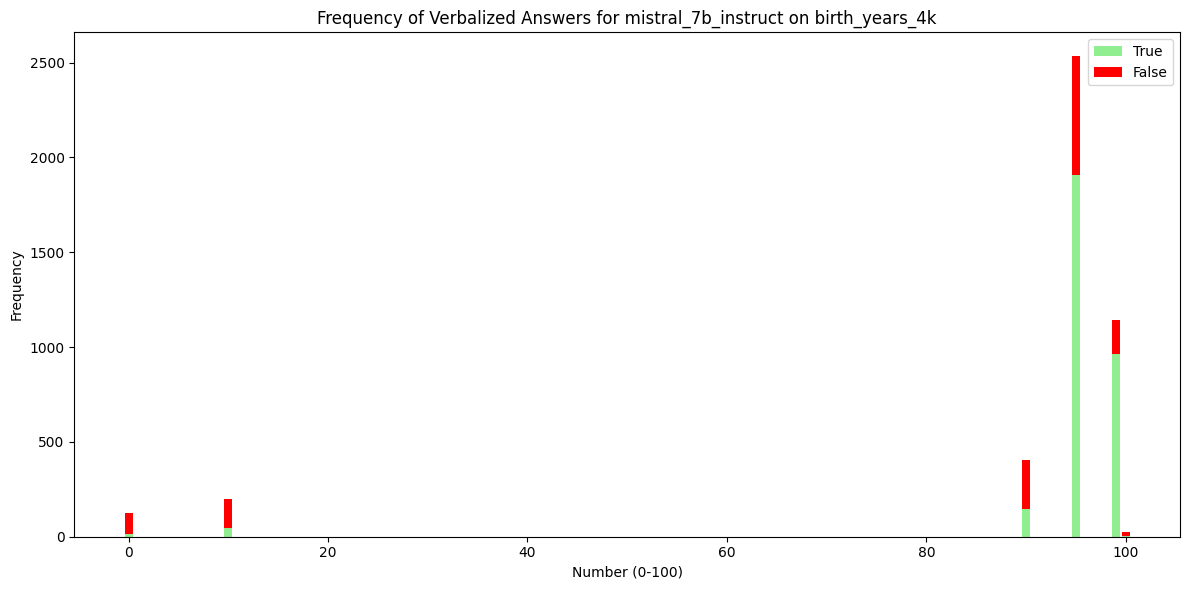

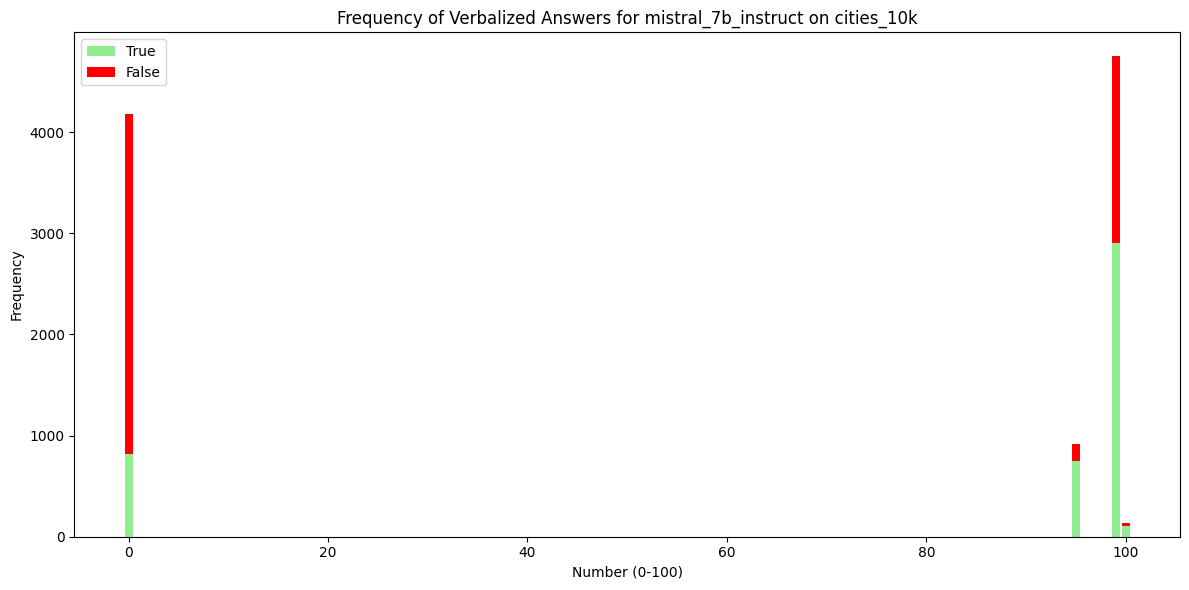

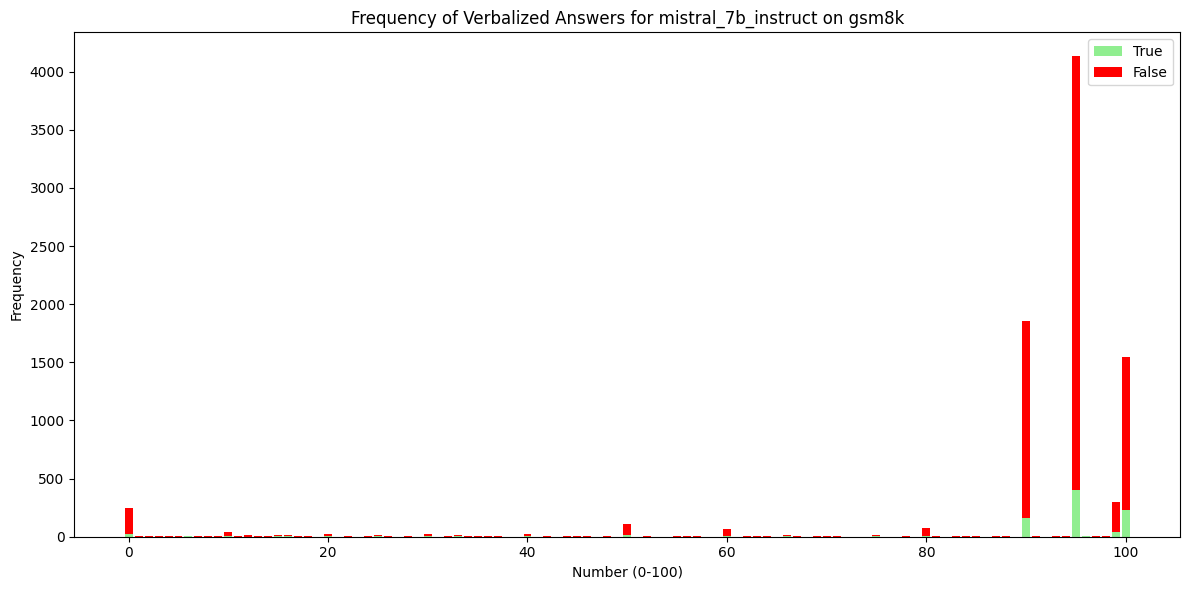

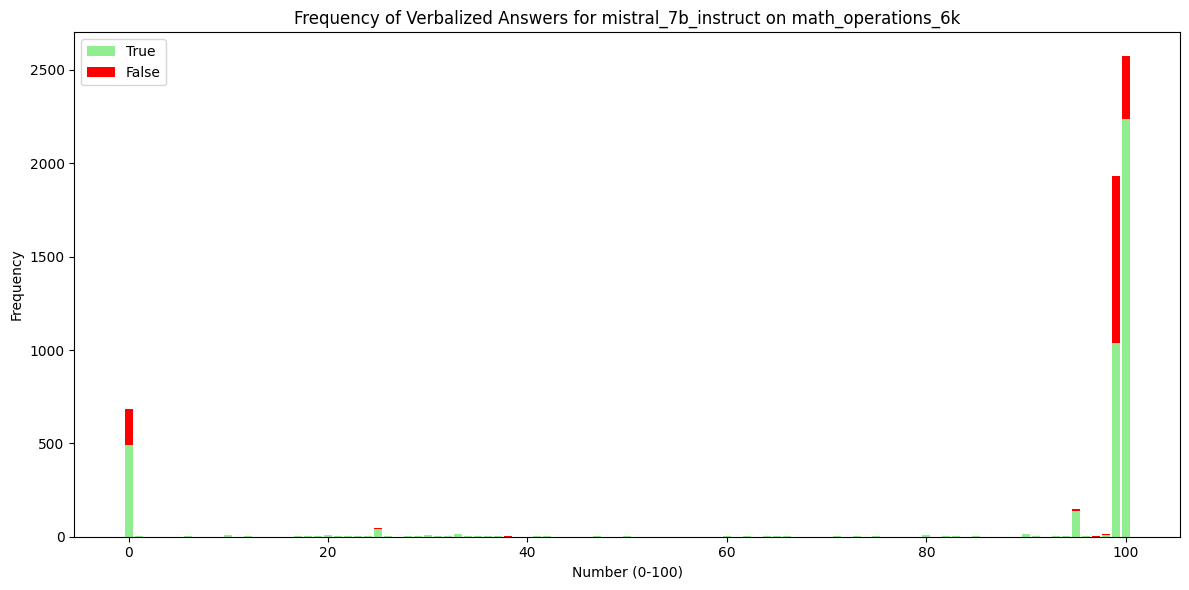

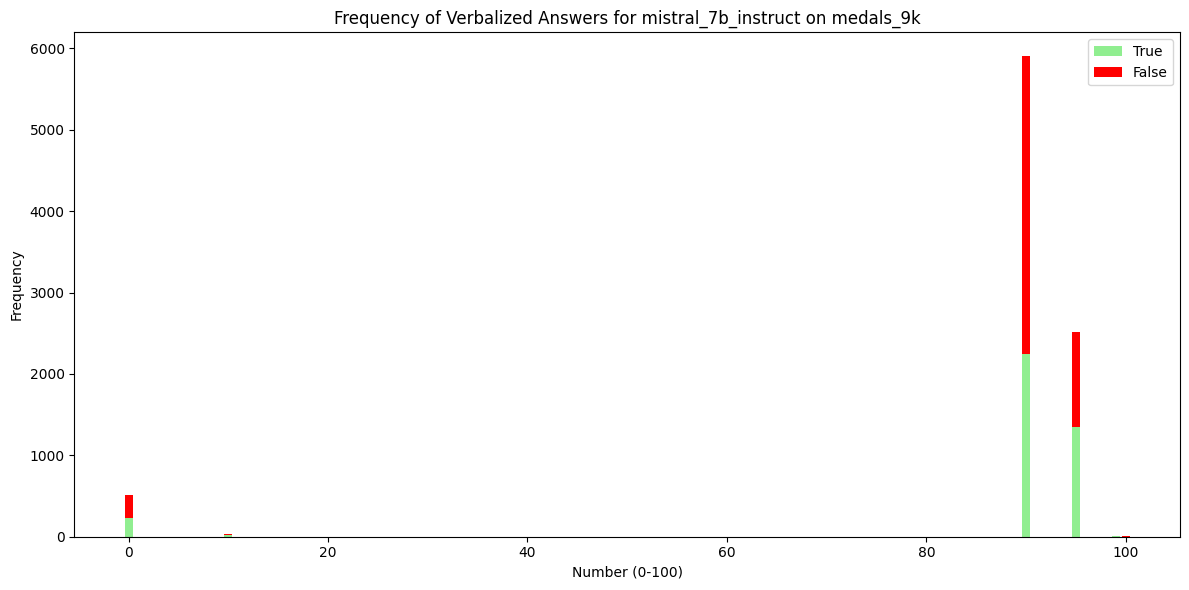

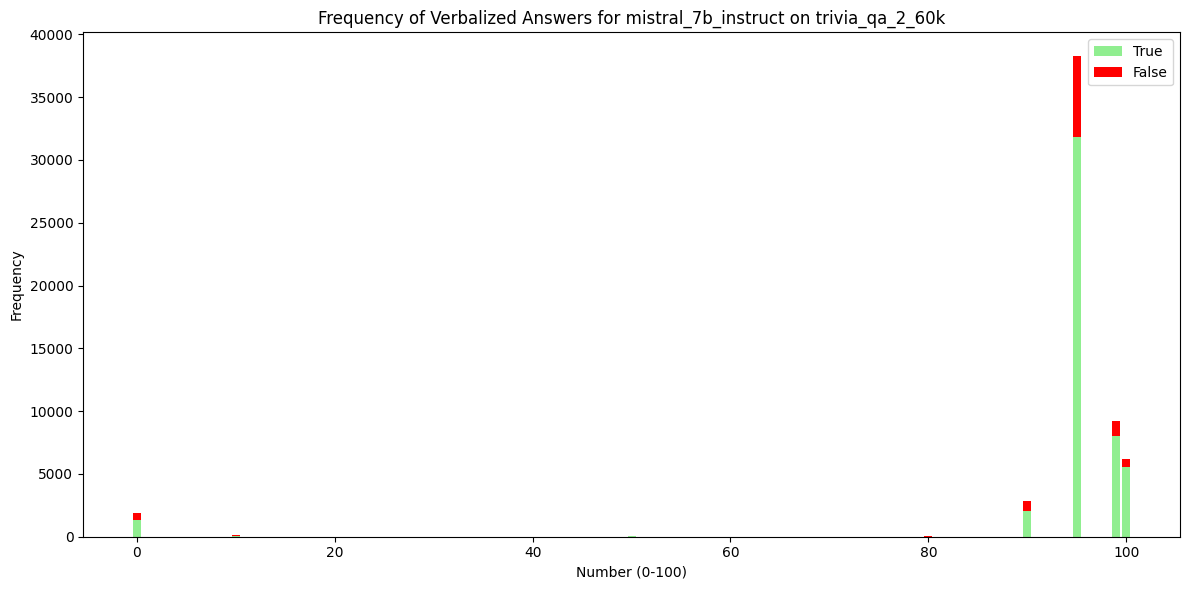

Model: llama3.1_8b_chat


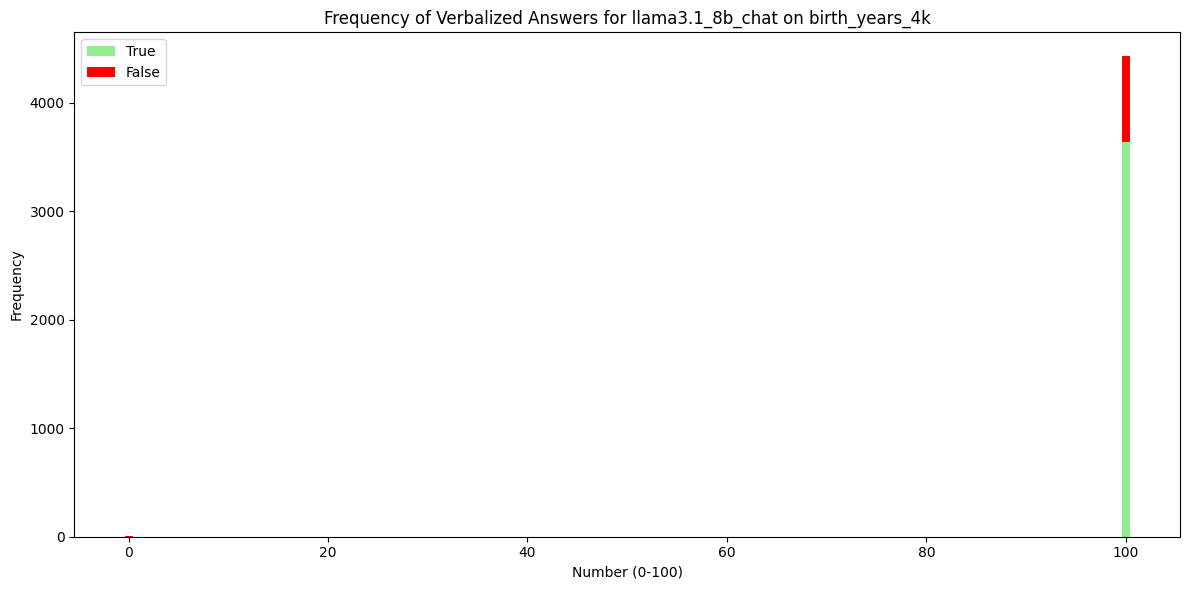

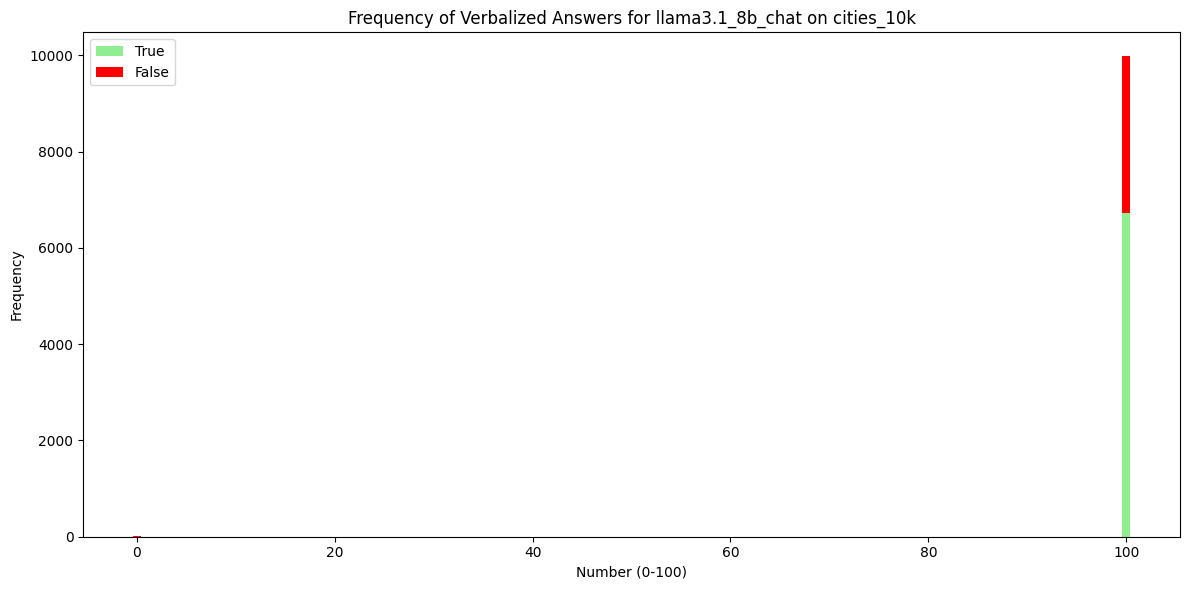

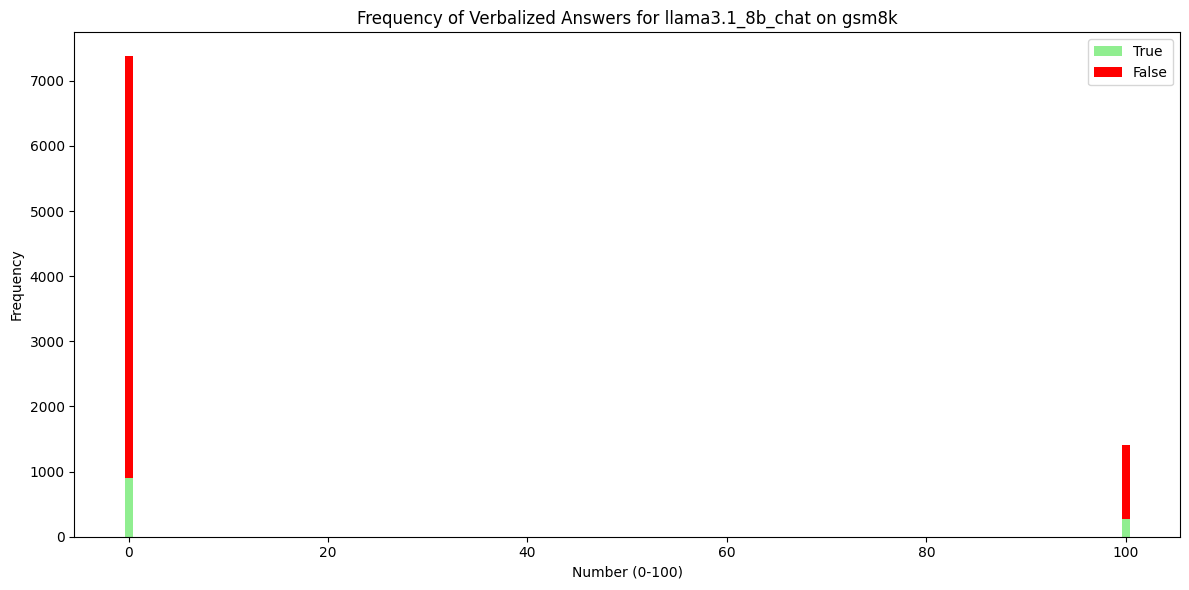

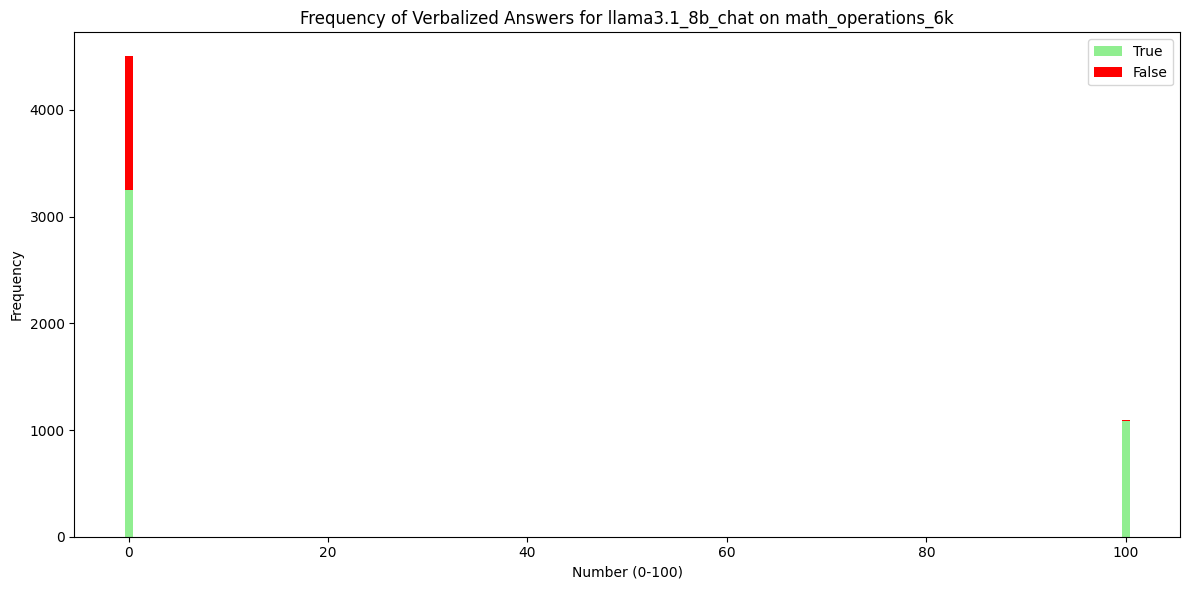

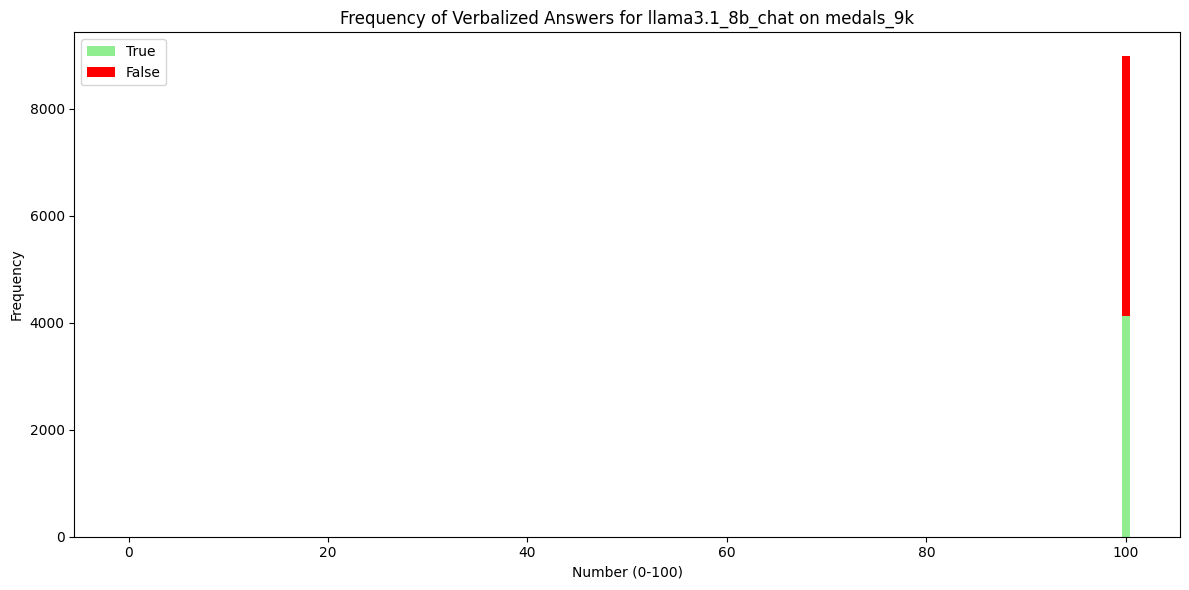

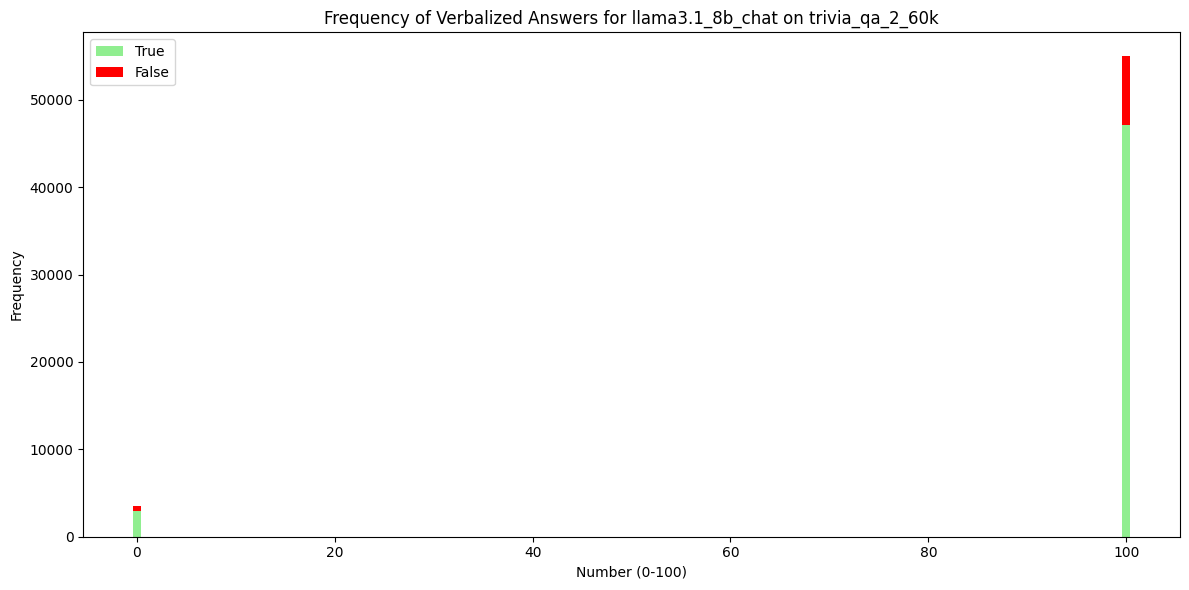

Model: ministral_8b_instruct


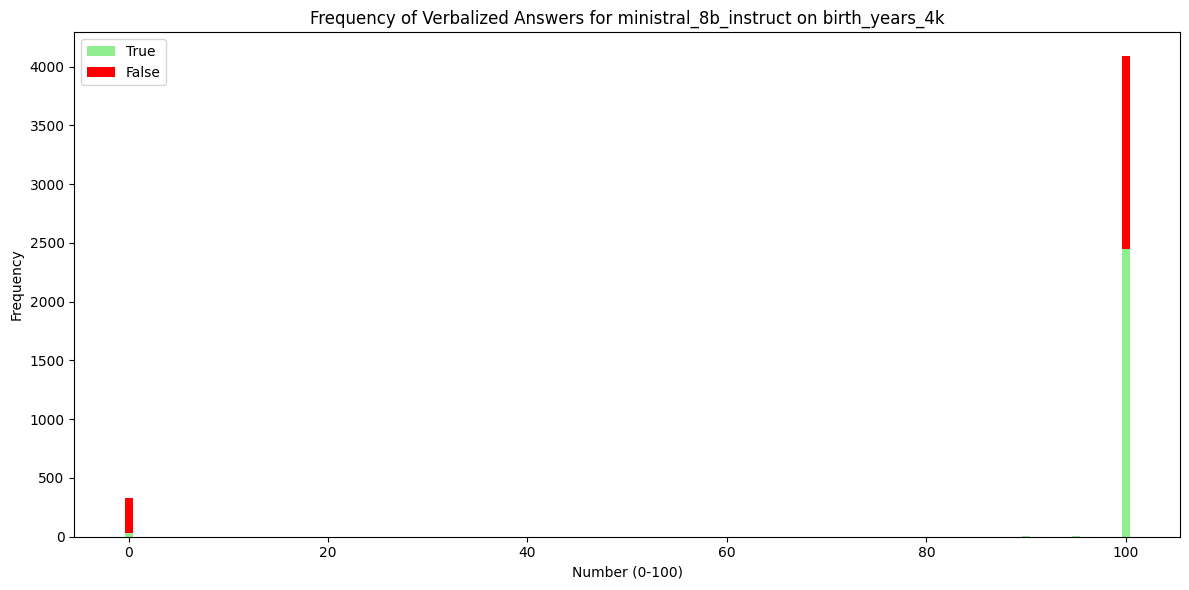

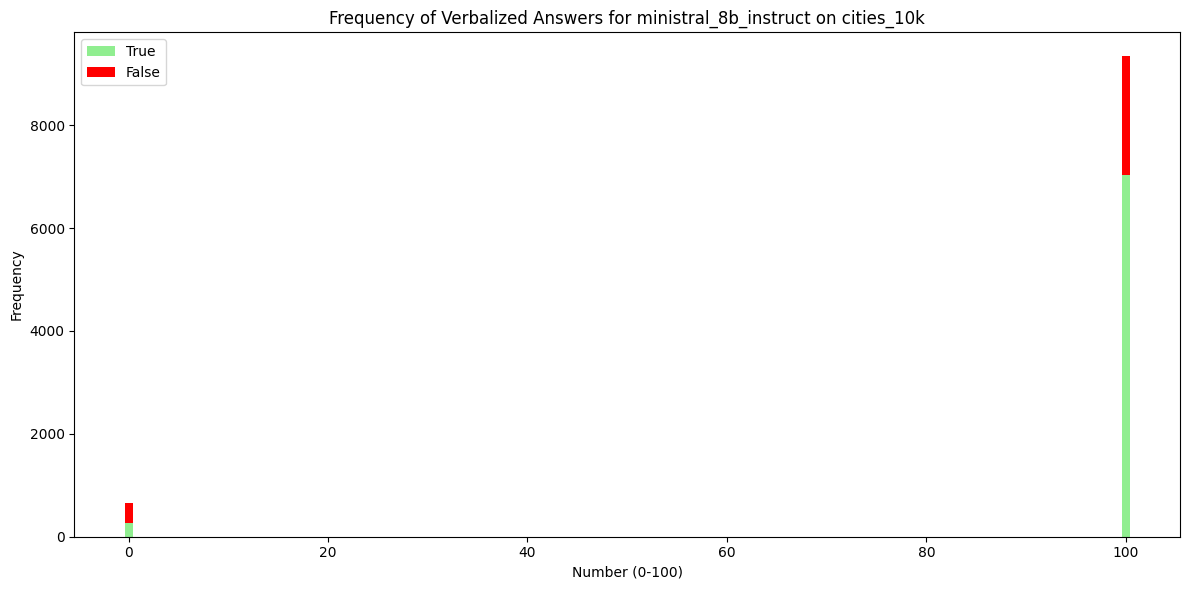

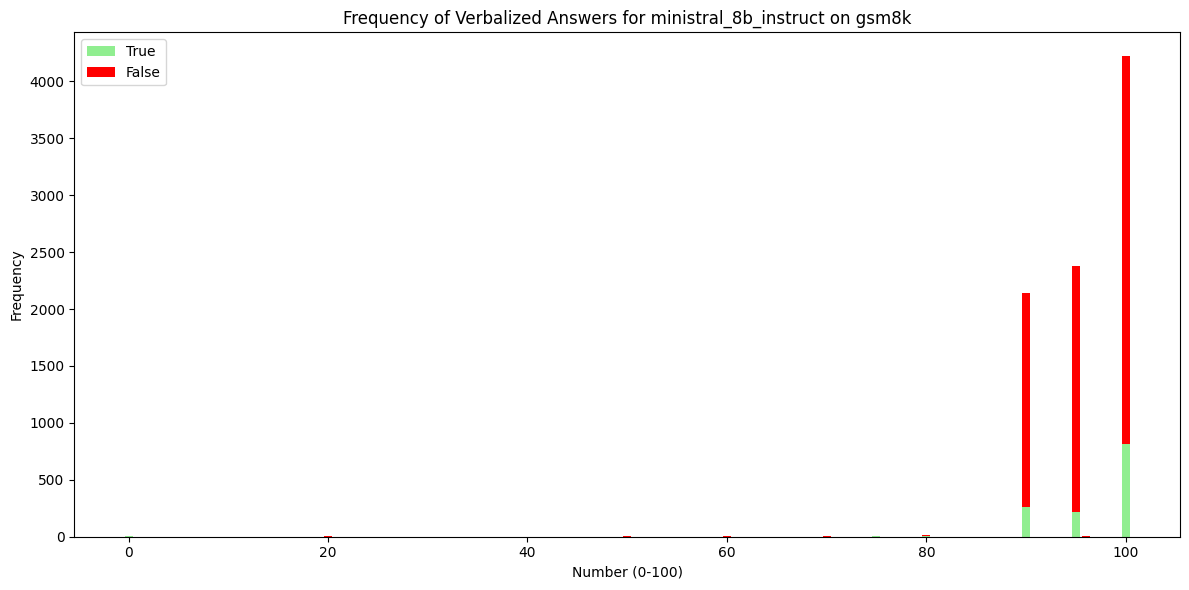

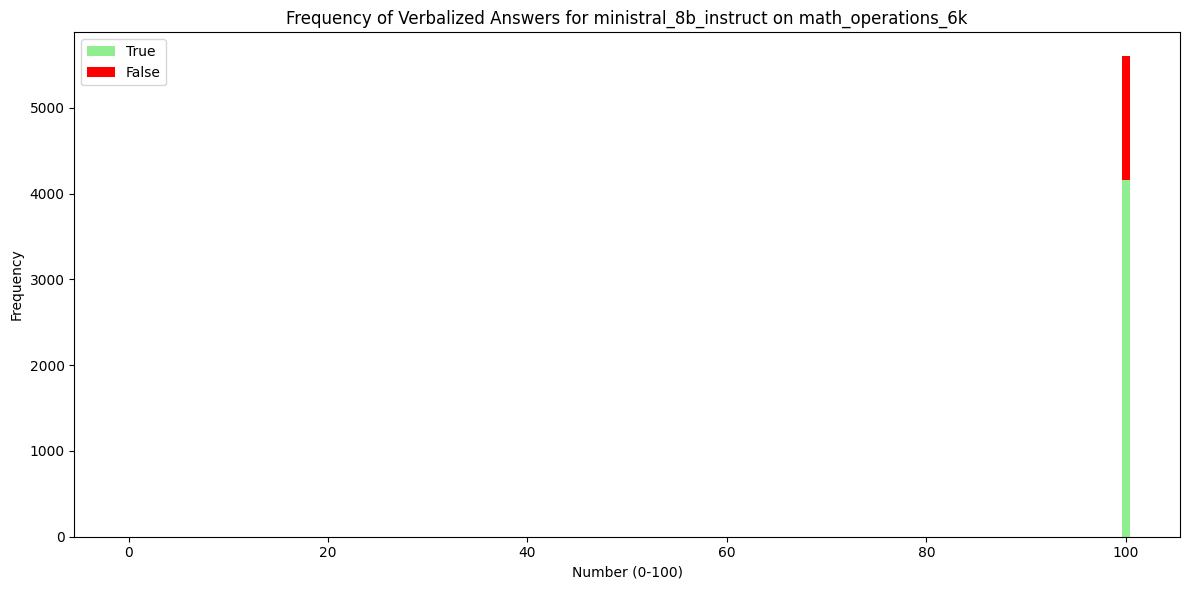

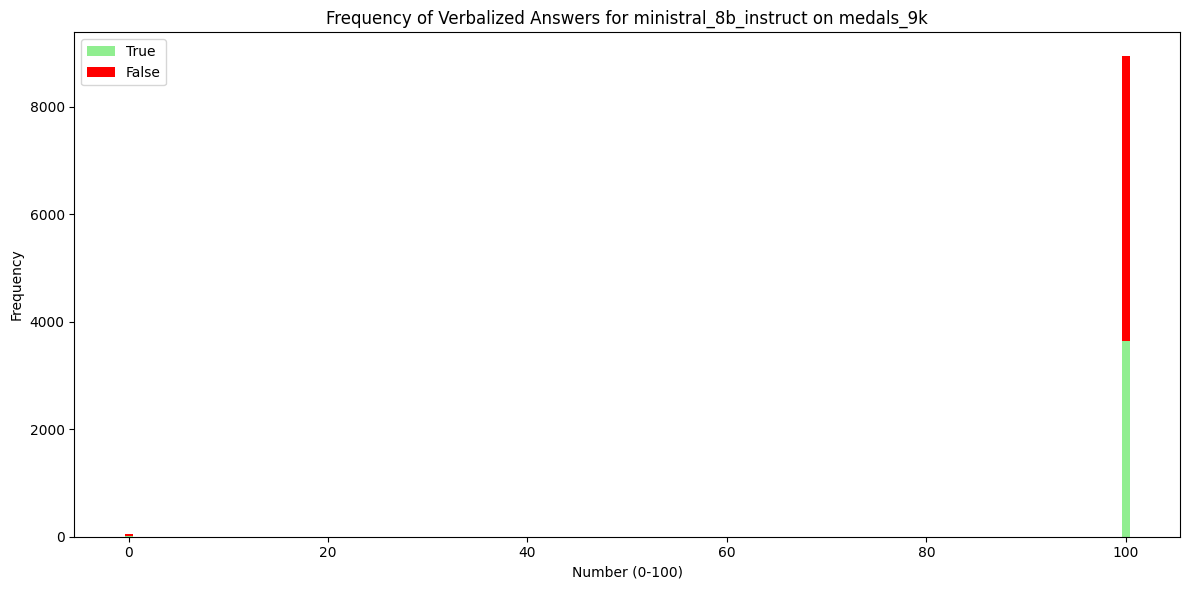

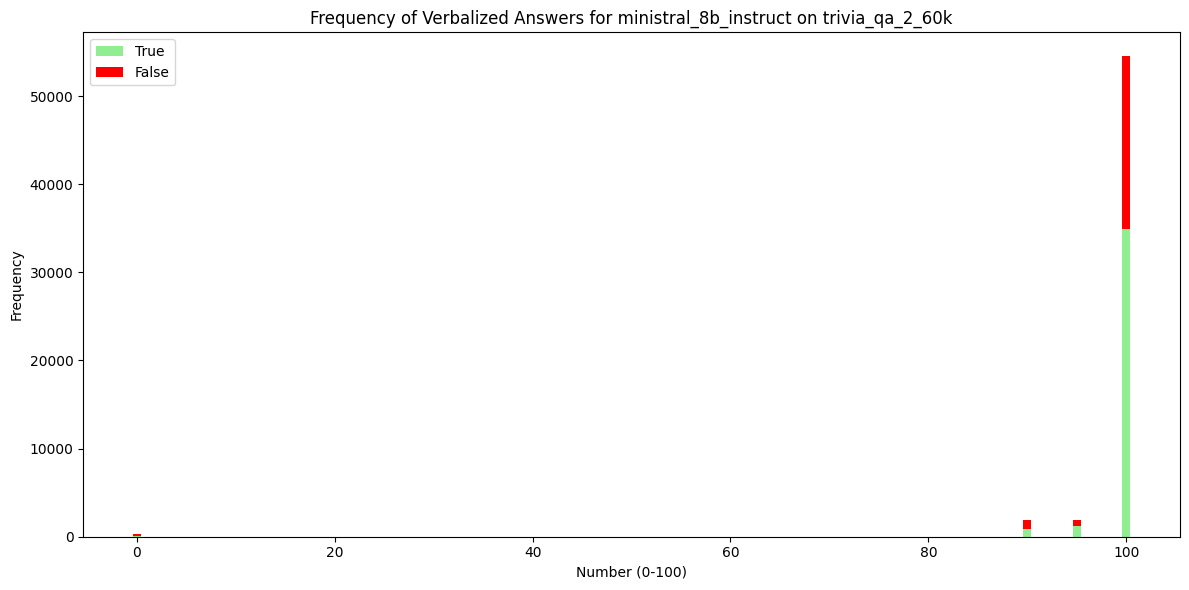

In [95]:
# All Plots
models = ["mistral_7b_instruct", "llama3.1_8b_chat", "ministral_8b_instruct"]
datasets = ["birth_years_4k", "cities_10k", "gsm8k", "math_operations_6k", "medals_9k", "trivia_qa_2_60k"]
print("Verbalized confidence AUROC")
for model in models:
    print(f"Model: {model}")
    for dataset in datasets:
        if dataset != "gsm8k":
            df_evals = pd.read_csv(f"{base_path_evals}/{model}/{dataset}/base/main_generations_evaluated.csv")
        else:
            df_evals = pd.read_csv(f"{base_path_evals}/{model}/{dataset}/base_3_shot/main_generations_evaluated.csv")
        df_verb = pd.read_csv(f"{base_path_verbalized}/{model}/{dataset}/verbalized_confidence_raw/main_generations.csv")
        labels = df_evals["correct"]
        answers = df_verb["answer"].apply(lambda x: x.split("%")[0].strip())
        answers = answers.apply(lambda x: x.split(".")[0].strip())
        answers = answers.apply(lambda x: x if isinstance(x, str) and x.isdigit() and 0 <= int(x) <= 100 else "0")
        answers = answers.astype("int")
        true_counts = answers[labels].value_counts().sort_index()
        false_counts = answers[~labels].value_counts().sort_index()
        index_range = pd.Index(range(0, 101))
        true_counts = true_counts.reindex(index_range, fill_value=0)
        false_counts = false_counts.reindex(index_range, fill_value=0)
        plt.figure(figsize=(12, 6))
        plt.bar(index_range, true_counts, color='lightgreen', label='True')
        plt.bar(index_range, false_counts, bottom=true_counts, color='red', label='False')
        plt.xlabel('Number (0-100)')
        plt.ylabel('Frequency')
        plt.title(f'Frequency of Verbalized Answers for {model} on {dataset}')
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"../verbalized_confidence/plots/verbalized_plot_{model}_{dataset}.png")
        plt.show()

# Compare AUROC

### Mistral

In [88]:
datasets = ["birth_years_4k", "cities_10k", "gsm8k", "math_operations_6k", "medals_9k", "trivia_qa_2_60k"]
mistral_balauroc_direction_trivia_l22 = [0.876, 0.894, 0.547, 0.908, 0.691, 0.772]
mistral_balauroc_verbalized = [0.686, 0.705, 0.525, 0.617, 0.558, 0.570]

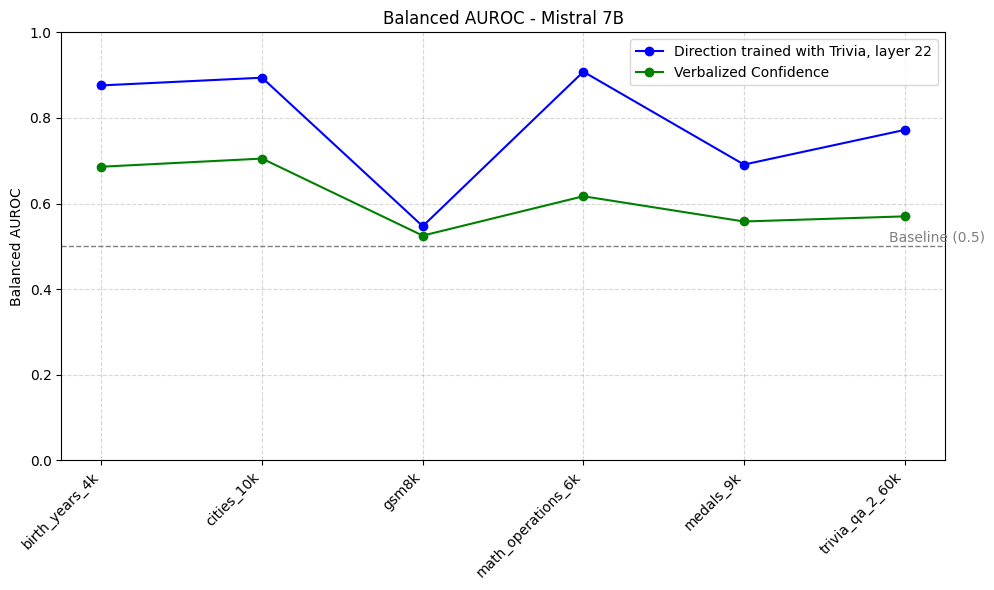

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(datasets, mistral_balauroc_direction_trivia_l22, marker='o', label='Direction trained with Trivia, layer 22', color='blue')
plt.plot(datasets, mistral_balauroc_verbalized, marker='o', label='Verbalized Confidence', color='green')

# Baseline line at 0.5
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)
plt.text(len(datasets)-0.5, 0.505, 'Baseline (0.5)', color='gray', fontsize=10, va='bottom', ha='right')

plt.ylabel('Balanced AUROC')
plt.title('Balanced AUROC - Mistral 7B')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

### Llama 3.1 8B

In [ ]:
datasets = ["birth_years_4k", "cities_10k", "gsm8k", "math_operations_6k", "medals_9k", "trivia_qa_2_60k"]
mistral_balauroc_direction_trivia_l22 = []
mistral_balauroc_verbalized = [0.500, 0.500, 0.540, 0.623, 0.500, 0.502]

### Ministral 8B

In [93]:
datasets = ["birth_years_4k", "cities_10k", "gsm8k", "math_operations_6k", "medals_9k", "trivia_qa_2_60k"]
mistral_balauroc_direction_trivia_l22 = [0.811, 0.835, 0.598, 0.850, 0.614, 0.733]
mistral_balauroc_verbalized = [0.573, 0.554, 0.577, 0.500, 0.502, 0.515]

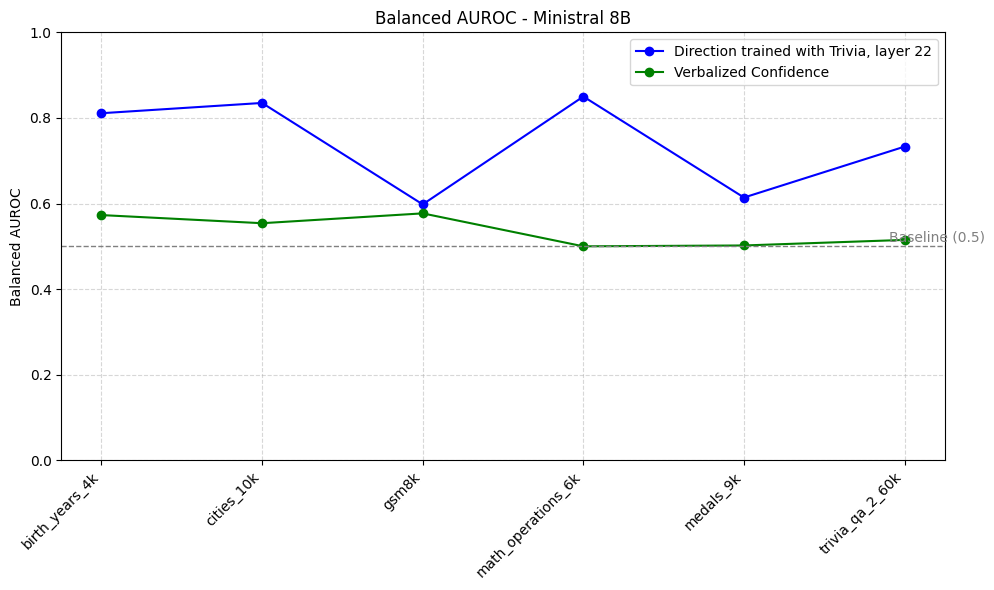

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(datasets, mistral_balauroc_direction_trivia_l22, marker='o', label='Direction trained with Trivia, layer 28', color='blue')
plt.plot(datasets, mistral_balauroc_verbalized, marker='o', label='Verbalized Confidence', color='green')

# Baseline line at 0.5
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)
plt.text(len(datasets)-0.5, 0.505, 'Baseline (0.5)', color='gray', fontsize=10, va='bottom', ha='right')

plt.ylabel('Balanced AUROC')
plt.title('Balanced AUROC - Ministral 8B')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()